<a href="https://colab.research.google.com/github/Suryans01/Sales-Prediction-LinearRegression/blob/main/Sales_Prediction_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Sales Prediction Using Regression Model**

In [38]:
#Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##**Importing Dataset**

In [39]:
df = pd.read_csv('/content/advertising.xls')

In [40]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [41]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [42]:
df.shape

(200, 4)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [44]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [45]:
df.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [46]:
df.drop_duplicates()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


We don't have any null or missing values in our dataset

In [47]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#**Data Visualization**

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

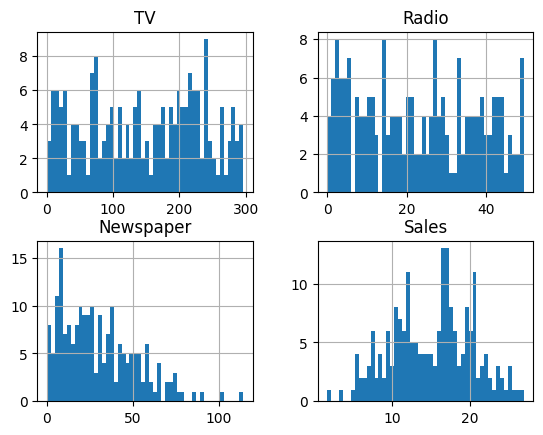

In [62]:
df.hist(bins=50)

##**Dataset Spliting into Training Testing**

In [48]:
x=df.iloc[:, 0:-1]

In [49]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [50]:
y=df.iloc[:,-1]

In [51]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [63]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [76]:
x_train

,TV,Radio,Newspaper
131,265.2,2.9,43.0
96,197.6,3.5,5.9
181,218.5,5.4,27.4
19,147.3,23.9,19.1
153,171.3,39.7,37.7
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [77]:
x_test

,TV,Radio,Newspaper
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [78]:
y_train

131    17.7
96     16.7
181    17.2
19     14.6
153    16.0
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales, Length: 140, dtype: float64

In [79]:
y_test

18     11.3
170     8.4
107    12.0
98     25.4
177    16.7
182     8.7
5       7.2
146    18.2
12      9.2
152    16.6
61     24.2
125    10.6
180    15.5
154    20.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     16.1
159    12.9
60      8.1
123    15.2
179    17.6
185    22.6
122    16.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      17.9
83     13.6
106     7.2
134    10.8
66     11.0
26     15.0
113    20.9
168    17.1
63     14.0
8       4.8
75      8.7
118    15.9
143    10.4
71     12.4
124    19.7
184    17.6
97     20.5
149    10.1
24      9.7
30     21.4
160    16.4
40     16.6
56      5.5
Name: Sales, dtype: float64

In [80]:
x_train = x_train.astype(int)
x_test = x_test.astype(int)
y_train = y_train.astype(int)
y_train = y_test.astype(int)

In [81]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)

##**Applyling Linear Regression**

In [82]:
from sklearn.linear_model import LinearRegression

In [84]:
lr =LinearRegression()
lr.fit(x,y)

LinearRegression()

##**Model Efficiency**

In [86]:
lr.score(x,y)*100

90.25912899684559

In [87]:
print("Cofficient", lr.coef_)
print("Intercept", lr.intercept_)

Cofficient [0.05444578 0.10700123 0.00033566]
Intercept 4.625124078808653


In [89]:
print('Predicted Output\n',lr.predict(x_test))

Predicted Output
 [10.52794933  8.53046845  9.53296444 24.87112474 14.64166336  8.218828
 10.22192362 18.44380522  9.64423778 17.81667027 23.34764986 10.54731193
 13.33535353 17.05653172 11.55241979 13.19533329 21.19328043  8.80085724
 13.91227661 18.79446832 24.87594756 12.35755548 16.51756805 13.69495578
  7.73180171 14.96402472 14.6843963  20.60794182 17.0400162   8.67573258
 12.16330058 20.66858824 21.27337788 21.82032395  6.95438488  6.896883
  9.13587315 15.51484498 13.04723921  7.17301618 10.67303661  8.88164406
 15.4634884  18.14767331 18.8111276  13.28431456  5.27502844 10.12718293
 15.30940781 10.83390374 12.06813673 20.54208577 20.65700203 16.89755793
  9.70248228  9.29081904 23.53375962 15.92589014 17.98760412  8.01604091]
